<a href="https://colab.research.google.com/github/rajusandrapati/Credit-Card-Fraud-Detection/blob/main/credit_card_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for numerical operations
import numpy as np

# to store and analysis data in dataframes
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import systemcheck

# python modules for data normalization and splitting
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# python modules for creating training and testing ml algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

# evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score, precision_score, recall_score, precision_recall_curve

sns.set()
import warnings
warnings.filterwarnings('ignore')

import pickle

In [ ]:
load_data=pd.read_csv("/content/drive/MyDrive/datasets/creditcard.csv")

In [ ]:
load_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
amount_col = load_data['Amount']
class_col = load_data['Class']
time_col = load_data['Time']

In [ ]:
load_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
load_data.shape

(284807, 31)

In [ ]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
load_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Fraud:  0.001727485630620034


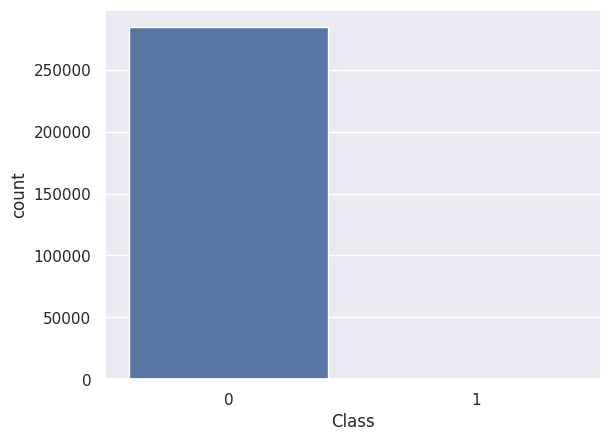

In [ ]:
sns.countplot(x='Class', data=load_data)
print("Fraud: ",load_data.Class.sum()/load_data.Class.count())

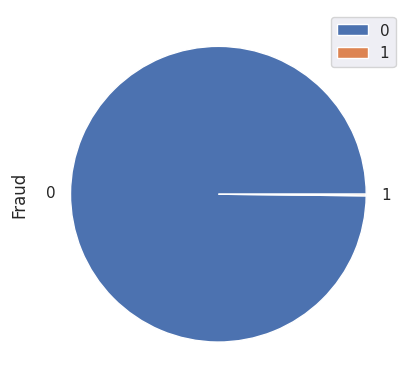

In [ ]:
Fraud_class = pd.DataFrame({'Fraud': load_data['Class']})
Fraud_class.apply(pd.value_counts).plot(kind='pie',subplots=True)
plt.show()

In [ ]:
fraud = load_data[load_data['Class'] == 1]
valid = load_data[load_data['Class'] == 0]

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
load_data.isna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
load_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

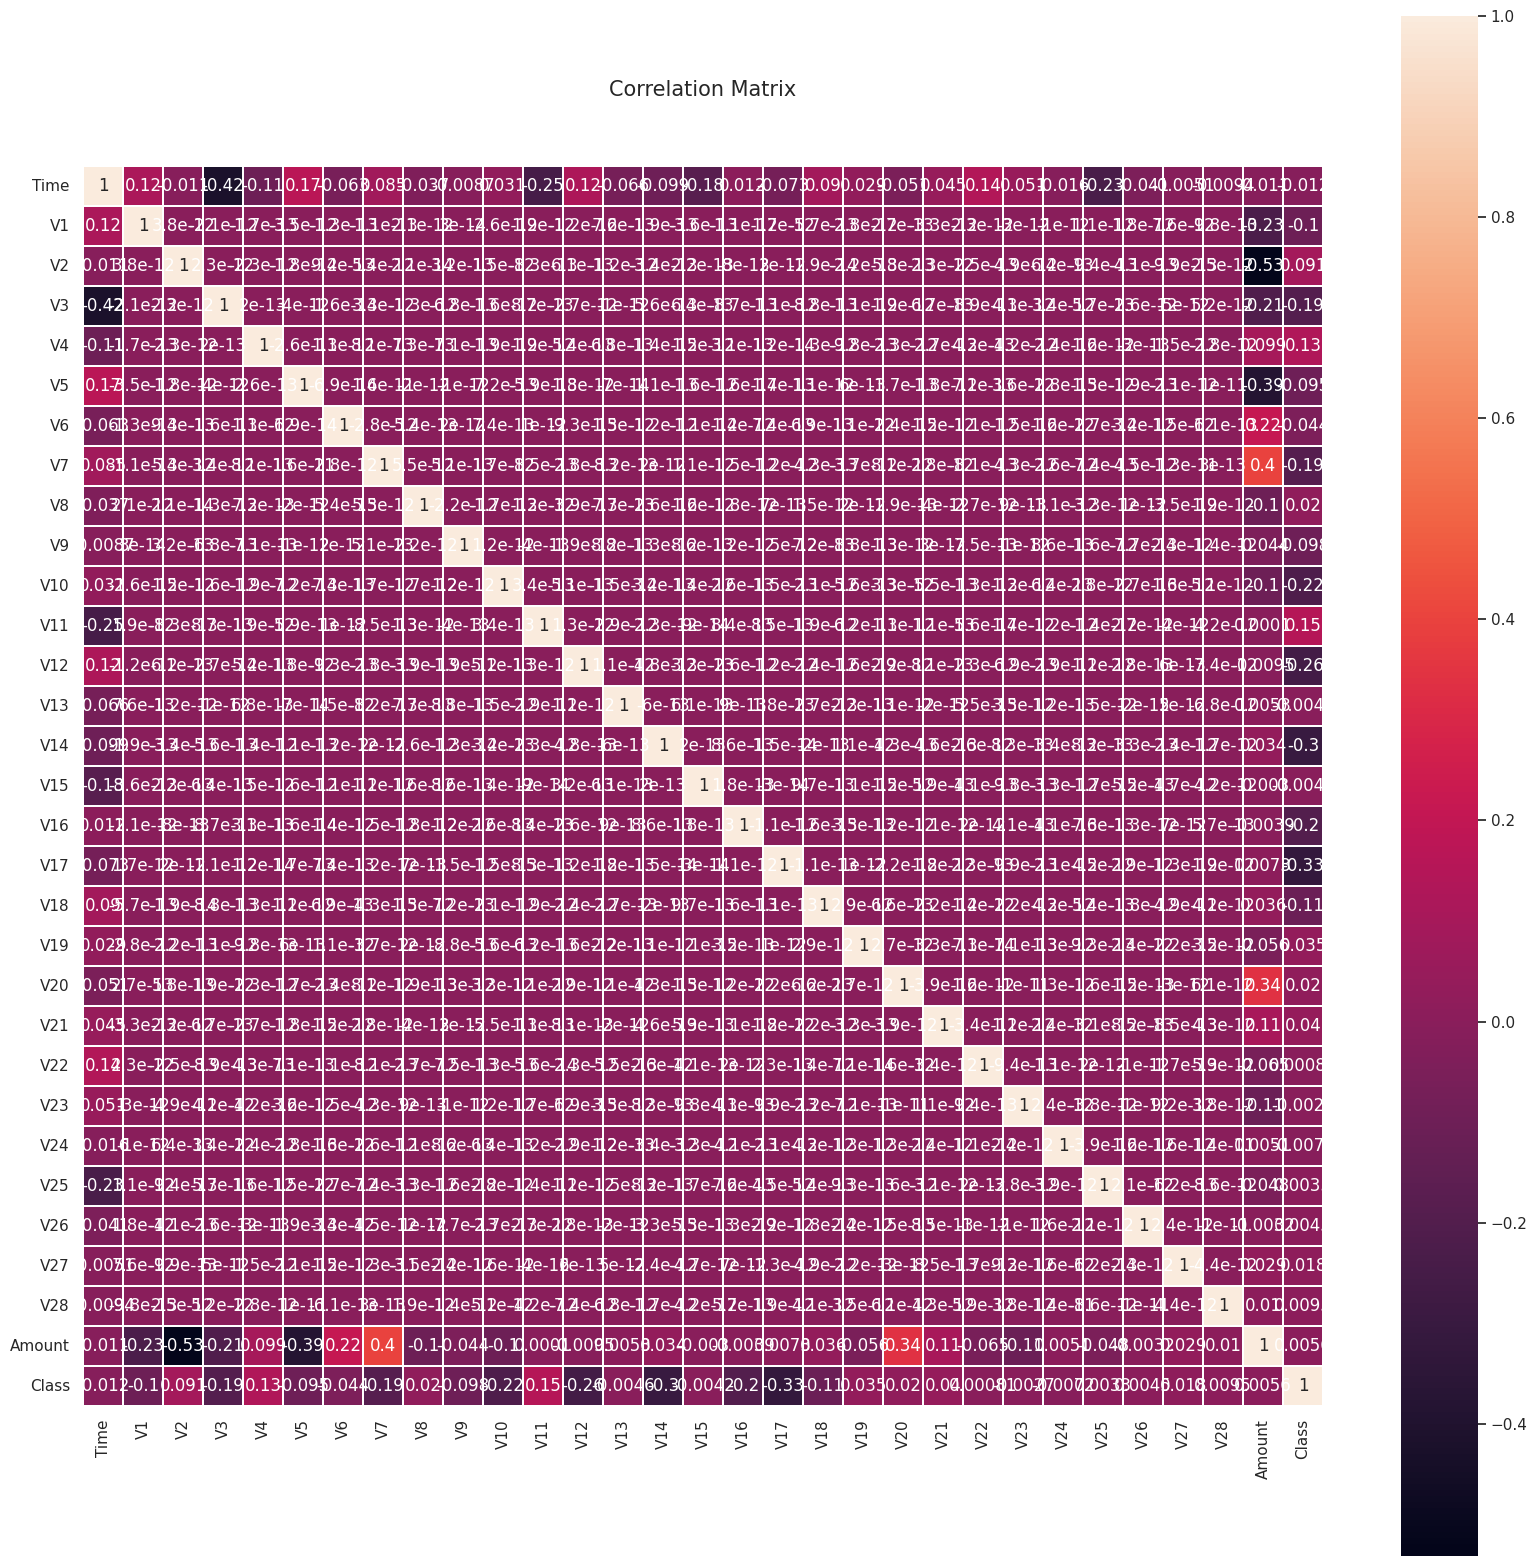

In [ ]:
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix', y=1.05, size=15)
sns.heatmap(load_data.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, linecolor='white', annot=True)
plt.show()

In [ ]:
df = load_data.drop(columns=['Time', 'Amount', 'Class'])

col_num = 10
pca = PCA(n_components=col_num)
pca.fit(df)

PCA(n_components=10)

In [ ]:
columns = ['V%i' % i for i in range(col_num)]
df_pca = pd.DataFrame(pca.transform(df), columns=columns, index=df.index)
df_pca.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,1.359809,0.072781,-2.536336,1.378163,0.338380,0.462101,0.239441,-0.098432,0.363723,-0.091985
1,-1.191866,-0.266148,-0.166553,0.448294,-0.059728,-0.082388,-0.079254,-0.086248,-0.254835,0.168811
2,1.358374,1.340140,-1.773157,0.379691,0.503238,1.800861,0.792757,-0.245194,-1.513879,-0.207431
3,0.966281,0.185169,-1.793143,-0.863072,0.011051,1.248072,0.238669,-0.378246,-1.389675,0.062193
4,1.158241,-0.877692,-1.548640,0.403094,0.407278,0.094918,0.591895,0.271630,0.815650,-0.758692


In [ ]:
df_pca['Time'] = time_col.values
df_pca['Amount'] = amount_col.values
df_pca['Class'] = class_col.values

data = df_pca.copy()
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,Time,Amount,Class
0,1.359809,0.072781,-2.536336,1.378163,0.338380,0.462101,0.239441,-0.098432,0.363723,-0.091985,0.0,149.62,0
1,-1.191866,-0.266148,-0.166553,0.448294,-0.059728,-0.082388,-0.079254,-0.086248,-0.254835,0.168811,0.0,2.69,0
2,1.358374,1.340140,-1.773157,0.379691,0.503238,1.800861,0.792757,-0.245194,-1.513879,-0.207431,1.0,378.66,0
3,0.966281,0.185169,-1.793143,-0.863072,0.011051,1.248072,0.238669,-0.378246,-1.389675,0.062193,1.0,123.50,0
4,1.158241,-0.877692,-1.548640,0.403094,0.407278,0.094918,0.591895,0.271630,0.815650,-0.758692,2.0,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,11.881111,-10.071616,9.834844,-2.066545,5.365054,-2.608412,-4.920625,-7.309435,1.894001,-4.362425,172786.0,0.77,0
284803,0.732826,0.054958,-2.035012,-0.738805,-0.868494,1.059365,0.026219,-0.289919,0.592917,0.962601,172787.0,24.79,0
284804,-1.919560,0.301302,3.249752,-0.557691,-2.630689,3.030308,-0.297375,-0.705411,0.437564,0.476507,172788.0,67.88,0
284805,0.240430,-0.530372,-0.702474,0.690046,0.378305,0.622863,-0.687213,-0.681138,0.390916,0.406265,172788.0,10.00,0


<Figure size 2000x1000 with 0 Axes>

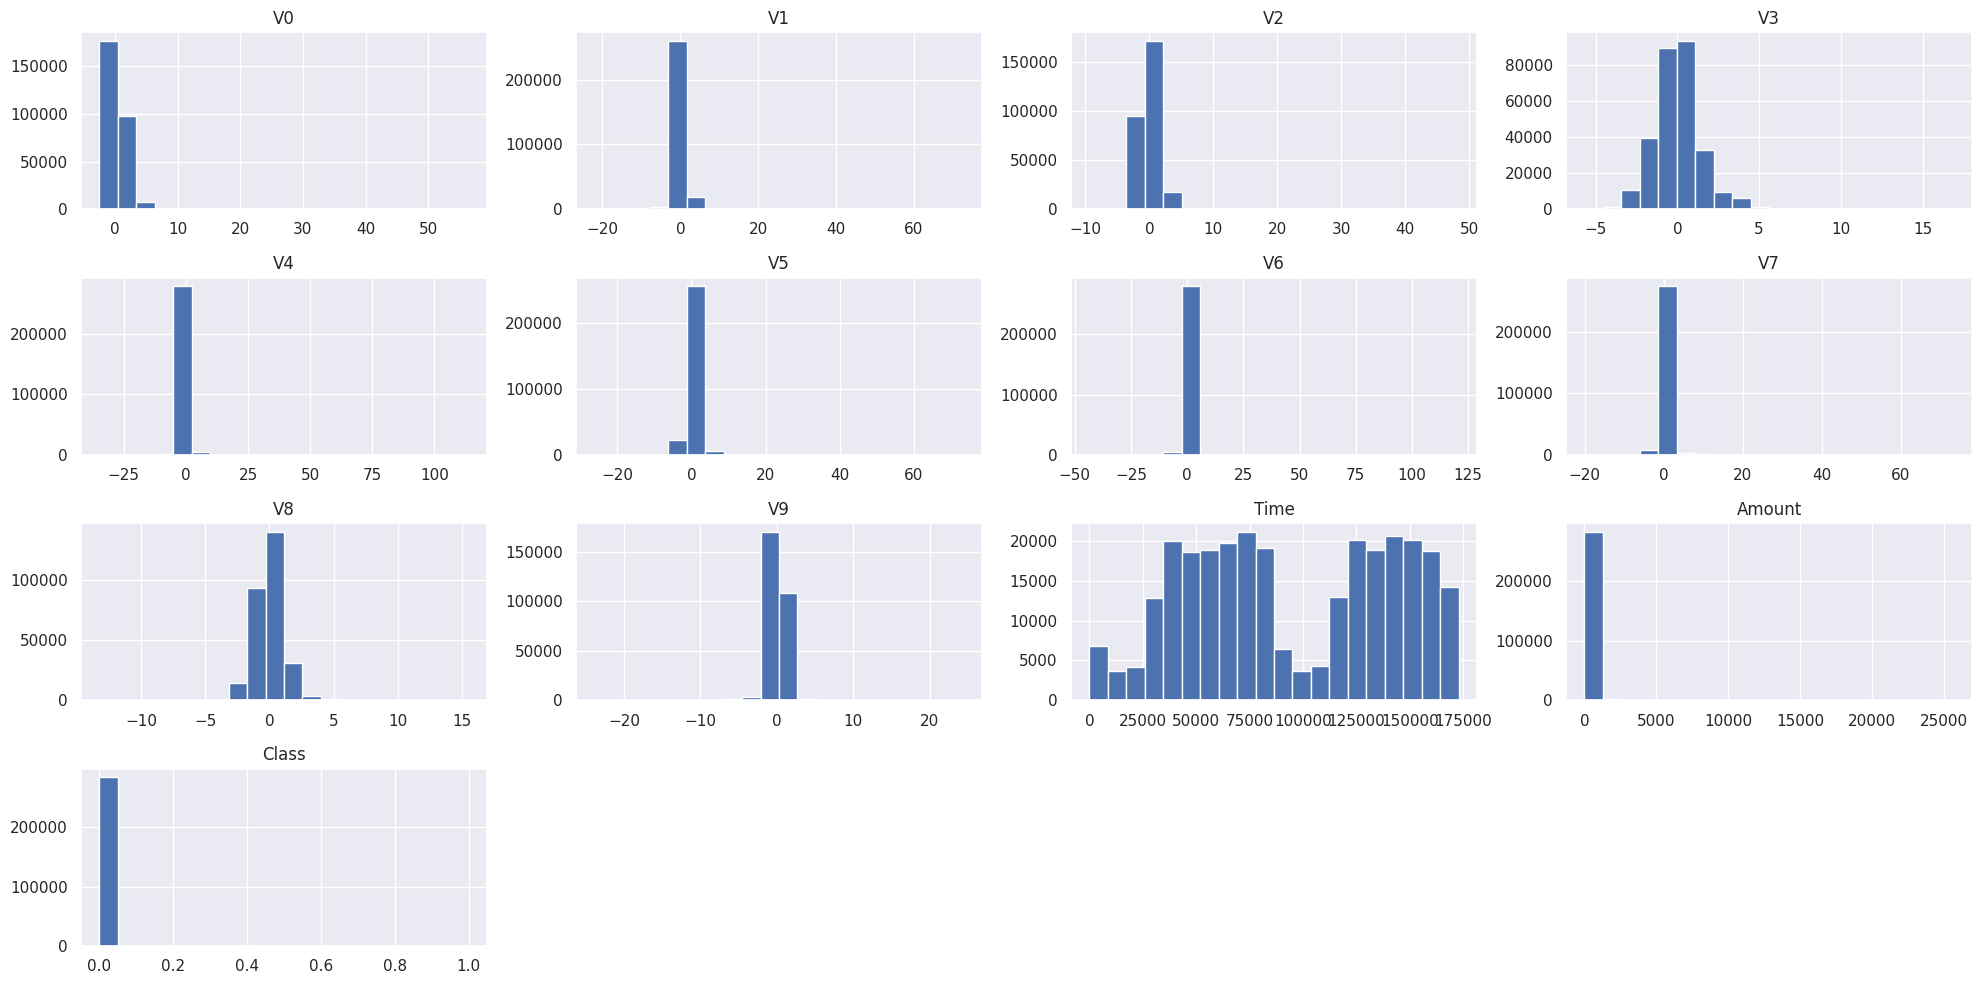

In [ ]:
plt.figure(figsize=(20, 10))
data.hist(bins=20, figsize=(20,10))
plt.tight_layout()
plt.show()

In [ ]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.value_counts())
print()

over = RandomOverSampler(random_state=42)
X_bal_over, Y_bal_over = over.fit_resample(X, Y)
print(X_bal_over.shape)
print(Y_bal_over.value_counts())
print()

(284807, 12)
Class
0    284315
1       492
Name: count, dtype: int64

(568630, 12)
Class
0    284315
1    284315
Name: count, dtype: int64



In [ ]:
df = pd.concat([pd.DataFrame(data=X_bal_over, columns=X.columns), pd.DataFrame(data=Y_bal_over, columns=["Class"])], axis=1)

df

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,Time,Amount,Class
0,1.359809,0.072781,-2.536336,1.378163,0.338380,0.462101,0.239441,-0.098432,0.363723,-0.091985,0.0,149.62,0
1,-1.191866,-0.266148,-0.166553,0.448294,-0.059728,-0.082388,-0.079254,-0.086248,-0.254835,0.168811,0.0,2.69,0
2,1.358374,1.340140,-1.773157,0.379691,0.503238,1.800861,0.792757,-0.245194,-1.513879,-0.207431,1.0,378.66,0
3,0.966281,0.185169,-1.793143,-0.863072,0.011051,1.248072,0.238669,-0.378246,-1.389675,0.062193,1.0,123.50,0
4,1.158241,-0.877692,-1.548640,0.403094,0.407278,0.094918,0.591895,0.271630,0.815650,-0.758692,2.0,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-1.081226,-0.416495,-0.862921,2.520642,0.004867,0.564089,-0.122175,-0.222116,-0.674858,-0.647216,34521.0,1.52,1
568626,1.739360,-1.344700,0.534375,3.194630,0.415501,-1.259452,-2.337327,-0.711163,-1.406340,3.001826,53658.0,0.00,1
568627,0.860852,-3.131885,5.052996,5.420445,2.494147,-1.809571,-5.476622,-1.186477,-3.884399,7.075866,34687.0,19.02,1
568628,-1.159385,-2.844795,4.050492,4.778210,-2.947882,-2.010876,1.742757,0.408386,-2.446942,2.059109,40276.0,1.00,1


In [ ]:
rs = RobustScaler()
scaled_x = rs.fit_transform(X_bal_over)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(scaled_x, Y_bal_over, test_size = 0.3, random_state = 1)

In [ ]:
logr_clf = LogisticRegression(solver='liblinear')
logr_clf.fit(X_train, y_train)
y_pred_logr = logr_clf.predict(X_test)

In [ ]:
logr_accuracy = accuracy_score(y_test, y_pred_logr)
logr_f1_score = f1_score(y_test, y_pred_logr)
logr_precision_score = precision_score(y_test, y_pred_logr)
logr_recall_score= recall_score(y_test, y_pred_logr)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_logr)

In [ ]:
print("Logistic Regression Accuracy: ", logr_accuracy)
print("Logistic Regression f1 score: ", logr_f1_score)
print("Logistic Regression precision score: ", logr_precision_score)
print("Logistic Regression recall score: ", logr_recall_score)
print()


Logistic Regression Accuracy:  0.9392457895878398
Logistic Regression f1 score:  0.9372046242214197
Logistic Regression precision score:  0.9681659426911858
Logistic Regression recall score:  0.9081621869165463



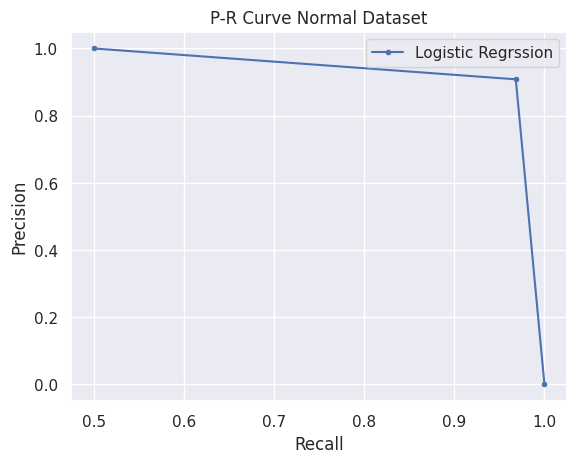

In [ ]:
plt.plot(precision, recall, marker='.', label='Logistic Regrssion')
plt.title("P-R Curve Normal Dataset")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
rf_clf = RandomForestClassifier(max_depth=5,random_state=3)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1_score = f1_score(y_test, y_pred_rf)
rf_precision_score = precision_score(y_test, y_pred_rf)
rf_recall_score= recall_score(y_test, y_pred_rf)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)

In [ ]:
print("Random Forest Accuracy: ", rf_accuracy)
print("Random Forest f1 score: ", rf_f1_score)
print("Random Forest precision score: ", rf_precision_score)
print("Random Forest recall score: ", rf_recall_score)
print()

Random Forest Accuracy:  0.9572832949369537
Random Forest f1 score:  0.9556662833780504
Random Forest precision score:  0.9915915460949928
Random Forest recall score:  0.9222531440448093



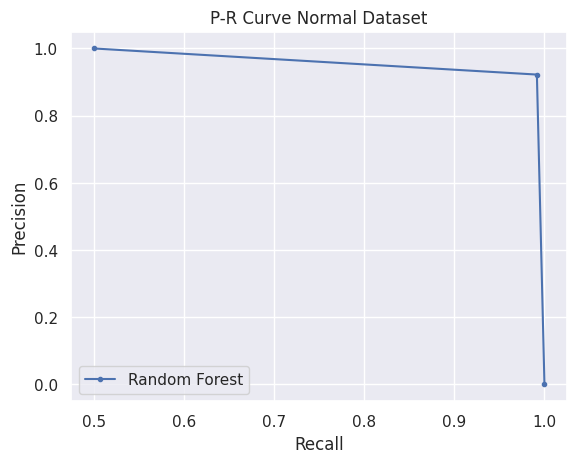

In [ ]:
plt.plot(precision, recall, marker='.', label='Random Forest')
plt.title("P-R Curve Normal Dataset")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=10,random_state=12)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1_score = f1_score(y_test, y_pred_dt)
dt_precision_score = precision_score(y_test, y_pred_dt)
dt_recall_score= recall_score(y_test, y_pred_dt)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_dt)

In [ ]:
print("Decision Tree Accuracy: ", dt_accuracy)
print("Decision Tree f1 score: ", dt_f1_score)
print("Decision Tree precision score: ", dt_precision_score)
print("Decision Tree recall score: ", dt_recall_score)
print()

Decision Tree Accuracy:  0.9912186600542825
Decision Tree f1 score:  0.9912127362530357
Decision Tree precision score:  0.990329727005263
Decision Tree recall score:  0.9920973215438992



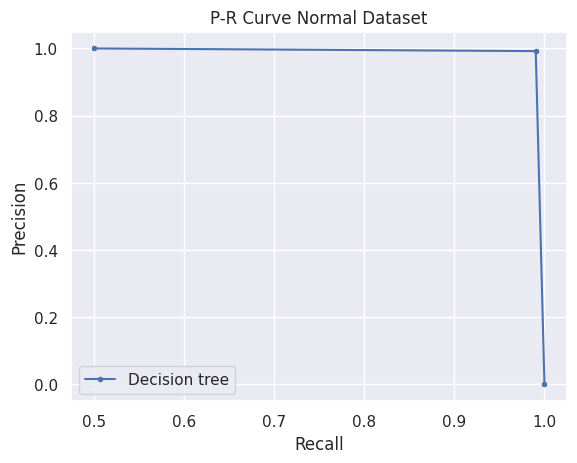

In [ ]:
plt.plot(precision, recall, marker='.', label='Decision tree')
plt.title("P-R Curve Normal Dataset")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

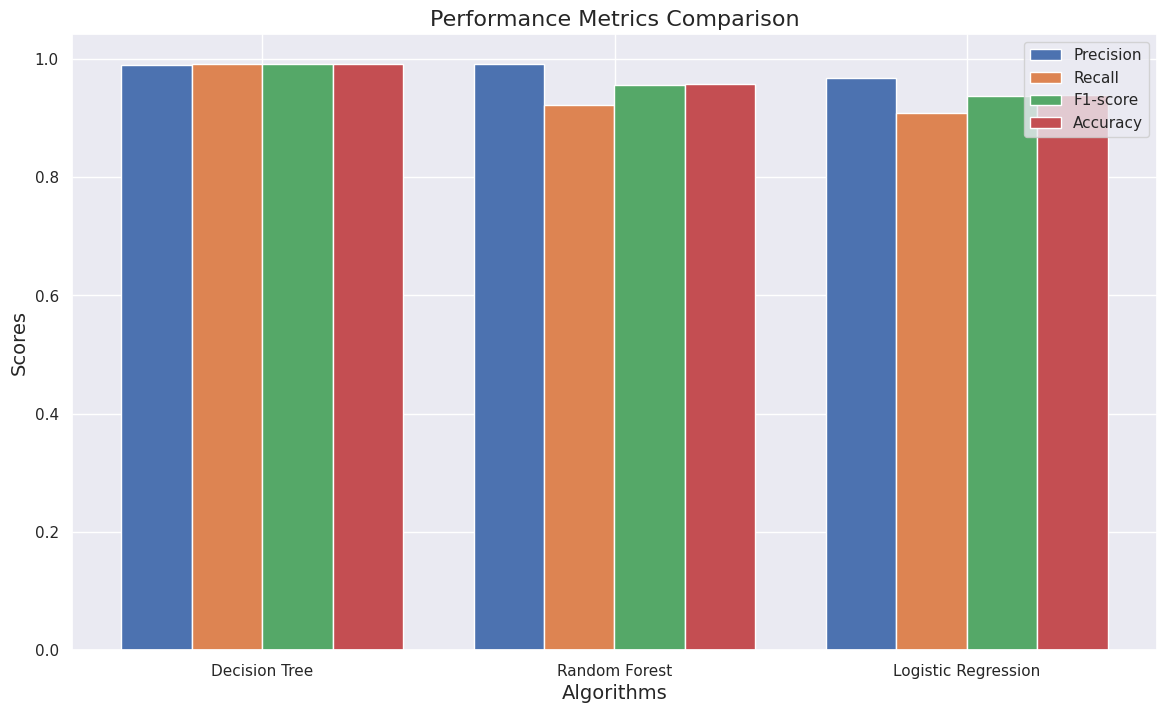

In [ ]:
algorithms = ["Decision Tree", "Random Forest", "Logistic Regression"]
precision = [dt_precision_score, rf_precision_score, logr_precision_score]
recall = [dt_recall_score, rf_recall_score, logr_recall_score]
f1score = [dt_f1_score, rf_f1_score, logr_f1_score]
accuracy = [dt_accuracy, rf_accuracy, logr_accuracy]

# Set the width of the bars
bar_width = 0.2

# Set the positions for the bars
index = range(len(algorithms))

# Plot the grouped bar chart
plt.figure(figsize=[14, 8])
plt.bar(index, precision, width=bar_width, label='Precision')
plt.bar([i + bar_width for i in index], recall, width=bar_width, label='Recall')
plt.bar([i + 2 * bar_width for i in index], f1score, width=bar_width, label='F1-score')
plt.bar([i + 3 * bar_width for i in index], accuracy, width=bar_width, label='Accuracy')

plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance Metrics Comparison', fontsize=16)
plt.xticks([i + 1.5 * bar_width for i in index], algorithms)
plt.legend()
plt.show()

In [ ]:
def predict_fraud(input):

    scaled_input = rs.transform([input])

    pred = logr_clf.predict(scaled_input)

    if pred == 1:
        return "Fraud Transaction"
    if pred == 0:
        return "Normal Transaction"

In [ ]:
predict_fraud([1.359796,0.072762,-2.536573,1.378246,0.337818,0.463313,0.239258,-0.094968,0.362326,-0.114178,-0.994983,1900])


'Normal Transaction'

In [ ]:
predict_fraud([0.564545,0.67655,0.78978,9899,6789,7890,3467,45678,4567,987,457,12234])

'Fraud Transaction'

In [ ]:
predict_fraud([-1.081228,-0.416402,-0.862890,2.520839,0.004834,0.563288,-0.123140,-0.223689,-0.679997,-0.636893,34521.0,16])

'Normal Transaction'